考核要求
1.读取数据，以“豆瓣评分”为标准，查看电影评分分布以及烂片情况


1.1 要求

①读取数据“moviedata.xslx”

In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.unicode.ambiguous_as_wide', True)#使Dataframe的中文列名对齐
pd.set_option('display.unicode.east_asian_width', True)#使Dataframe的中文列名对齐

In [2]:
df=pd.read_excel('moviedata.xlsx')
df.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,坏孩子的秋天,263.0,7.5,暂无,肖政 / 施大生 / 贾媛媛 / 王静,中国大陆,NaN,邓科,90,剧情 / 儿童,陆长河,汉语普通话,0.220,0.424,0.280,0.059,0.017
1,黑猫大旅社 黑貓大旅社,514.0,6.8,不详,陆奕静 / 老鄧 （夏靖庭 ） / 蔡振南,台湾,Hotel Black Cat,徐丽雯,112,剧情,徐丽雯,台湾国语,0.102,0.332,0.453,0.091,0.022
2,追捕,NaN,NaN,2018-02(香港),张涵予 / 戚薇 / 福山雅治 / 河智苑 / 国村隼 / 池内博之 / 樱庭奈奈美 / ...,香港,Manhunt,吴宇森,NaN,剧情 / 动作,吴宇森 / 阮世生 / 西村寿行,NaN,0.000,0.000,0.000,0.000,0.000
3,无问西东,NaN,NaN,2018(中国大陆),章子怡 / 张震 / 黄晓明 / 王力宏 / 陈楚生 / 韩童生 / 王盛德 / 姚晨 /...,中国大陆,Forever Young,李芳芳,NaN,剧情 / 爱情 / 战争,李芳芳,汉语普通话,0.000,0.000,0.000,0.000,0.000
4,绣春刀II：修罗战场,NaN,NaN,2017-07(中国大陆),张震 / 杨幂 / 张译 / 雷佳音 / 辛芷蕾 / 李媛,中国大陆,绣春刀前传 / 绣春刀：修罗场 / 绣春刀2：修罗战场,路阳,NaN,动作 / 武侠 / 古装,陈舒,汉语普通话,0.000,0.000,0.000,0.000,0.000


②查看“豆瓣评分”分布

In [3]:
print('豆瓣评分|电影数量')
df['豆瓣评分'].value_counts()

豆瓣评分|电影数量


6.8    59
7.3    59
6.4    58
6.5    56
6.6    56
5.7    56
5.9    53
6.3    52
7.0    51
5.6    51
6.7    51
5.3    51
7.1    49
6.2    49
6.1    49
5.0    49
5.8    49
5.4    48
6.0    46
7.5    46
7.4    46
4.0    45
3.4    44
5.5    44
7.2    43
4.8    42
7.6    42
5.1    41
3.5    40
6.9    40
       ..
3.8    26
2.7    26
7.7    26
4.1    25
7.8    25
4.2    25
8.3    25
3.0    23
3.9    23
2.9    23
8.2    18
8.0    18
7.9    18
2.6    16
8.1    15
2.4    14
8.4    14
8.6    11
2.5     9
8.5     7
9.1     6
9.0     5
2.3     4
2.2     3
8.9     3
8.8     2
9.2     2
8.7     2
9.3     1
2.1     1
Name: 豆瓣评分, Length: 73, dtype: int64

绘制直方图、箱体图

In [4]:
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7DDF76F28>]],
      dtype=object)

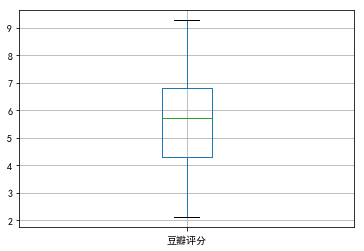

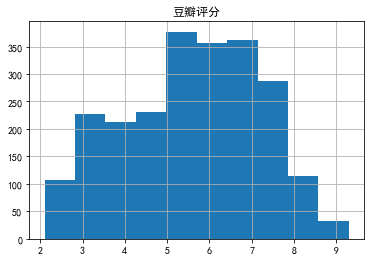

In [5]:
fig1=df.boxplot(column='豆瓣评分',grid=True)
fig1
fig2=df.hist(column='豆瓣评分',grid=True)
fig2

③判断“烂片标准”→这里以上四分位数（该样本中所有数值从小到大排列后第25%的数字），评分为烂片标准

In [6]:
df['豆瓣评分'].describe()

count    2306.000000
mean        5.604250
std         1.595514
min         2.100000
25%         4.300000
50%         5.700000
75%         6.800000
max         9.300000
Name: 豆瓣评分, dtype: float64

In [7]:
tf_standard=df['豆瓣评分'].describe(percentiles=[.25]).iloc[4]#tf_standard：烂片标准（从小到大排序后第25%的数字）
print('烂片标准是：'+str(tf_standard)+'分')

烂片标准是：4.3分


④筛选出烂片数据，并做排名，找出TOP20

In [8]:
tf_data=df[df['豆瓣评分']<tf_standard]#tf_data：筛选出豆瓣评分低于烂片标准4.3分的烂片数据
tf_data

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
19,龙门劫案,70.0,4.0,2016年,杨皓宇 / 刘冠麟 / 李子雄 / 刘子赫,中国大陆,NaN,王勇,62分钟,NaN,张凯,汉语普通话,0.060,0.040,0.200,0.220,0.480
23,宠灵实验室之狸奴艾莉,37.0,3.7,2016-4-1,陈冠良 / 夏雪娇,中国大陆,宠灵实验室-狸奴艾莉 / 艾莉,郝昭赫,72分钟,爱情 / 科幻,郝昭赫,汉语普通话,0.040,0.080,0.120,0.200,0.560
32,惊天破,10465.0,3.8,2016-10-20(香港/中国大陆) / 2016-06-13(上海国际电影节)...,谢霆锋 / 刘青云 / 佟丽娅 / 范晓萱 / 思漩 / 谭俊彦 / 高伟光 / 蔡瀚亿 ...,中国大陆 / 香港,惊心破 / 破地狱 / Heartfall Arises,吴品儒,103分钟,剧情 / 动作 / 悬疑 / 犯罪,吴品儒 / 顾舒怡,汉语普通话,0.012,0.033,0.206,0.361,0.389
37,王牌逗王牌,15061.0,3.4,2016-09-30(中国大陆),刘德华 / 黄晓明 / 王祖蓝 / 胡然 / 欧阳娜娜 / 谢依霖 / 沈腾 / 赵英俊 ...,中国大陆 / 香港,偷天特务(港) / 盗中盗 / 爱上贼中贼 / Mission Milano...,王晶,102分钟,喜剧 / 动作 / 冒险,王晶,汉语普通话,0.015,0.024,0.143,0.294,0.524
38,爵迹,73064.0,3.7,2016-09-29(中国大陆),范冰冰 / 吴亦凡 / 陈学冬 / 陈伟霆 / 郭采洁 / 杨幂 / 林允 / 严屹宽 /...,中国大陆,NaN,郭敬明,121分钟,动画 / 奇幻,郭敬明,汉语普通话,0.042,0.067,0.171,0.151,0.568
39,大话西游3,35406.0,3.7,2016-09-14(中国大陆),韩庚 / 唐嫣 / 吴京 / 莫文蔚 / 张超 / 张瑶 / 王一博 / 钟欣潼 / 谢楠...,中国大陆 / 香港,大话西游终结篇 / A Chinese Odyssey：Part Three / A Ch...,刘镇伟,93分钟,喜剧 / 爱情 / 奇幻,刘镇伟,汉语普通话,0.046,0.052,0.151,0.219,0.532
44,新大头儿子和小头爸爸2一日成才,1523.0,4.1,2016-08-19(中国大陆),刘纯燕 / 董浩 / 鞠萍 / 林永健 / 林大竣 / 郏捷 / 何子然 / 陈苏 / 耿...,中国大陆,NaN,何澄 / 张振益,85分钟,喜剧 / 动画 / 家庭,吴楠 / 吴垠 / 贺崧 / 叶琳,汉语普通话,0.047,0.086,0.207,0.205,0.454
46,盲少爷的小女仆,224.0,3.1,2016-08-03(中国大陆),冯芷墨 / 刘泯廷,中国大陆,虐心爱情故事暑期特别版之盲少爷的小女仆,禇会林,104分钟,爱情,李新雨,汉语普通话,0.028,0.028,0.070,0.190,0.683
47,触碰,33.0,3.3,2016-07-30(中国大陆),李佳儒 / 时卉 / 胡雅娟,中国大陆,NaN,王子 / 叶桢,77分钟,剧情 / 喜剧 / 爱情 / 同性,王子 / 岳杨 / 宋思翰,汉语普通话,0.000,0.000,0.250,0.167,0.583
48,封神传奇,30490.0,2.9,2016-07-29(中国大陆),李连杰 / 范冰冰 / 黄晓明 / 杨颖 / 古天乐 / 文章 / 向佐 / 梁家辉 / ...,香港 / 中国大陆,封神榜 / 3D封神榜 / 封神传奇之雷震子 / League of Gods...,许安,109分钟,剧情 / 动作 / 奇幻,张炭 / 张志光 / 孙子荣,汉语普通话,0.022,0.018,0.080,0.166,0.713


In [9]:
tf_data_rank=tf_data.sort_index(axis=0,ascending=True,by=['豆瓣评分'])#tf_data_rank：烂片排名
tf_data_top20=tf_data_rank.head(20)#tf_data_top20：烂片TOP20
tf_data_top20

C:\Users\86132\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

by argument to sort_index is deprecated, please use .sort_values(by=...)



,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
60,渡灵人,176.0,2.1,2016-07-04(中国大陆),王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇,中国大陆,NaN,孔令杭,63分钟,剧情,樊聪,汉语普通话,0.000,0.000,0.024,0.000,0.976
239,白日杀机,131.0,2.2,2015-08-10,张小仟 / 章宇 / 郑诺 / 亦涵,中国大陆,NaN,张帆,62分钟,恐怖,NaN,汉语普通话,0.000,0.000,0.011,0.055,0.934
1161,大震撼,210.0,2.2,2011-05-19(中国大陆),石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西...,中国大陆,NaN,崔立新,NaN,剧情,NaN,汉语普通话,0.014,0.000,0.000,0.023,0.963
966,戚继光英雄传,794.0,2.2,2012-06-01(中国大陆),NaN,中国大陆,The Legend of The Hero,姚林 / 杨清峰 / 吴鲁光 / 沈丹冶,90分钟,剧情 / 动画 / 传记 / 历史,符利群,汉语普通话,0.027,0.000,0.002,0.004,0.967
1155,B区32号,5331.0,2.3,2011-06-03(中国大陆),邓紫衣 / 唐宸禹 / 李锐,中国大陆,"No. 32, B District",吕建民,89分钟,剧情 / 惊悚 / 恐怖,张二,汉语普通话,0.021,0.004,0.011,0.045,0.918
375,找个高富帅？,659.0,2.3,2015-01-16(中国大陆),徐申东 / 张惠鑫 / 曲昱曈 / 王乐天 / 王妍 / 闫美伊 / 陈童 / 李飞...,中国大陆,找个高富帅 / 谈婚论嫁18天 / Who's the One,陈童,90分钟,喜剧 / 爱情,陈童 / 张惠鑫,汉语普通话,0.023,0.000,0.014,0.050,0.913
2357,换脸新娘,93.0,2.3,NaN,翟文斌 / 吴菲 / 褚颖颖 / 林娜,中国大陆,NaN,林云翔,NaN,爱情 / 短片,于正,汉语普通话,0.016,0.000,0.032,0.032,0.919
125,皇帝的新装之圣诞大明星,114.0,2.3,2016-01-01(中国大陆),NaN,中国大陆,The Emperor’s New Clothes,李霞,78分钟,喜剧 / 动画,NaN,汉语普通话,0.000,0.014,0.029,0.043,0.913
524,整形归来,66.0,2.4,2014-06-12(中国大陆),苏菲 / 张乃歌 / 张慧雯,中国大陆,整容归来,张翔宇,52分钟,NaN,NaN,汉语普通话,0.000,0.025,0.000,0.125,0.850
106,火星归来,149.0,2.4,2016-02-19(中国大陆),马诺 / 胡北 / 高森鹏 / 刘谋峰 / Edward Zee,中国大陆,三休之火星归来 / Mars Return,刘谋峰,60分钟,NaN,NaN,NaN,0.043,0.000,0.000,0.011,0.946


1.2注意：
①读取数据之后去除缺失值
烂片评价标准：4.3分，整理之后烂片数据大概546条

___________________________________________________

___________________________________________________

___________________________________________________

2.1要求：
①按照“类型”字段分类，筛选不同电影属于什么题材
②整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20

In [10]:
c1=df.dropna(axis='index',subset=['类型','豆瓣评分'])#删除“类型”与"豆瓣评分"字段中的空值数据
c2=c1.applymap((lambda x: "".join(x.split()) if type(x) is str else x))#再删除“类型”字段中的空格字符
c2.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,坏孩子的秋天,263.0,7.5,暂无,肖政/施大生/贾媛媛/王静,中国大陆,NaN,邓科,90,剧情/儿童,陆长河,汉语普通话,0.220,0.424,0.280,0.059,0.017
1,黑猫大旅社黑貓大旅社,514.0,6.8,不详,陆奕静/老鄧（夏靖庭）/蔡振南,台湾,HotelBlackCat,徐丽雯,112,剧情,徐丽雯,台湾国语,0.102,0.332,0.453,0.091,0.022
7,我心雀跃,209.0,6.7,2017-04(中国大陆)/2016-06-14(上海国际电影节),孙伊涵/宋宁/周楚楚/修健/杜双宇/刘锐/池韵/刘北妍/任运杰...,中国大陆,MyHeartLeapsUp,刘紫微,95分钟,剧情,刘紫微,汉语普通话,0.086,0.345,0.432,0.115,0.022
21,一个成人电影工作者的自白,132.0,7.6,2016-6-15,NaN,中国大陆,NaN,贾小熊,17分钟,短片,贾小熊,汉语普通话,0.256,0.422,0.211,0.100,0.011
23,宠灵实验室之狸奴艾莉,37.0,3.7,2016-4-1,陈冠良/夏雪娇,中国大陆,宠灵实验室-狸奴艾莉/艾莉,郝昭赫,72分钟,爱情/科幻,郝昭赫,汉语普通话,0.040,0.080,0.120,0.200,0.560


In [11]:
#c3：所有电影按题材分类的数量情况#
print('题材  |  电影总数')
c3=pd.DataFrame(np.array(c2['类型'].str.split(pat="/",expand=True)).reshape(-1,1))[0].value_counts()
c3

题材  |  电影总数


剧情        972
喜剧        574
爱情        550
动作        307
悬疑        216
惊悚        194
古装        129
短片        125
动画        116
犯罪        104
纪录片      103
家庭         89
冒险         85
奇幻         84
恐怖         69
战争         68
历史         68
儿童         59
武侠         59
传记         39
同性         34
音乐         29
科幻         27
情色         12
运动         11
歌舞         10
灾难         10
戏曲          7
脱口秀        7
鬼怪          3
黑色电影      3
真人秀        2
西部          2
News          1
舞台艺术      1
Name: 0, dtype: int64

In [12]:
#c4：删除烂片“类型”与"豆瓣评分"字段中的空值数据,再删除烂片“类型”字段中的空格字符
c4=tf_data.dropna(axis='index',subset=['类型','豆瓣评分']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
c4.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
23,宠灵实验室之狸奴艾莉,37.0,3.7,2016-4-1,陈冠良/夏雪娇,中国大陆,宠灵实验室-狸奴艾莉/艾莉,郝昭赫,72分钟,爱情/科幻,郝昭赫,汉语普通话,0.040,0.080,0.120,0.200,0.560
32,惊天破,10465.0,3.8,2016-10-20(香港/中国大陆)/2016-06-13(上海国际电影节)...,谢霆锋/刘青云/佟丽娅/范晓萱/思漩/谭俊彦/高伟光/蔡瀚亿/高捷/邓萃雯...,中国大陆/香港,惊心破/破地狱/HeartfallArises,吴品儒,103分钟,剧情/动作/悬疑/犯罪,吴品儒/顾舒怡,汉语普通话,0.012,0.033,0.206,0.361,0.389
37,王牌逗王牌,15061.0,3.4,2016-09-30(中国大陆),刘德华/黄晓明/王祖蓝/胡然/欧阳娜娜/谢依霖/沈腾/赵英俊/戚薇/徐冬冬/毛俊杰/吴樾...,中国大陆/香港,偷天特务(港)/盗中盗/爱上贼中贼/MissionMilano,王晶,102分钟,喜剧/动作/冒险,王晶,汉语普通话,0.015,0.024,0.143,0.294,0.524
38,爵迹,73064.0,3.7,2016-09-29(中国大陆),范冰冰/吴亦凡/陈学冬/陈伟霆/郭采洁/杨幂/林允/严屹宽/李治廷/王源/汪铎/郭敬明...,中国大陆,NaN,郭敬明,121分钟,动画/奇幻,郭敬明,汉语普通话,0.042,0.067,0.171,0.151,0.568
39,大话西游3,35406.0,3.7,2016-09-14(中国大陆),韩庚/唐嫣/吴京/莫文蔚/张超/张瑶/王一博/钟欣潼/谢楠/何炅/胡静/黄征/刘镇伟/曹承衍...,中国大陆/香港,大话西游终结篇/AChineseOdyssey：PartThree/AChineseOdys...,刘镇伟,93分钟,喜剧/爱情/奇幻,刘镇伟,汉语普通话,0.046,0.052,0.151,0.219,0.532


In [13]:
#c5：所有烂片按题材分类的数量情况#
print('题材  |  烂片总数')
c5=pd.DataFrame(np.array(c4['类型'].str.split(pat="/",expand=True)).reshape(-1,1))[0].value_counts()
c5

题材  |  烂片总数


喜剧        196
爱情        181
剧情        142
惊悚        109
悬疑         88
动作         77
恐怖         40
冒险         32
奇幻         29
动画         28
古装         22
犯罪         21
儿童         16
战争         12
家庭         10
科幻         10
历史          9
同性          9
情色          8
短片          6
武侠          5
音乐          5
传记          4
灾难          4
歌舞          3
戏曲          1
鬼怪          1
纪录片        1
运动          1
黑色电影      1
Name: 0, dtype: int64

In [14]:
#c6：将c3和c5按照索引进行合并，同时将c6数据集中的空值用0填充，这样以便下一步计算烂片比例#
c6=pd.concat([pd.DataFrame(data=c3),pd.DataFrame(data=c5)],axis=1,ignore_index=True).fillna(0)
c6

C:\Users\86132\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,0,1
News,1,0.0
传记,39,4.0
儿童,59,16.0
冒险,85,32.0
剧情,972,142.0
动作,307,77.0
动画,116,28.0
历史,68,9.0
古装,129,22.0
同性,34,9.0


In [15]:
#c7：对c6数据集列名重命名，两列相除，得出各题材烂片比例，再按照烂片比例进行降序排列，找出烂片比例最高的TOP20数据
c6.rename(columns={0:'电影总数',1:'烂片总数'},inplace=True)
c6['各题材烂片比例']=c6['烂片总数']/c6['电影总数']
c6.sort_values(by=['各题材烂片比例'],ascending=False,inplace=True)
c7=c6.head(20)#题材烂片比例TOP20
c7

,电影总数,烂片总数,各题材烂片比例
情色,12,8.0,0.666667
恐怖,69,40.0,0.579710
惊悚,194,109.0,0.561856
悬疑,216,88.0,0.407407
灾难,10,4.0,0.400000
冒险,85,32.0,0.376471
科幻,27,10.0,0.370370
奇幻,84,29.0,0.345238
喜剧,574,196.0,0.341463
鬼怪,3,1.0,0.333333


2.2注意：
①删除“类型”字段空值的数据
②由于同一个电影会有多个类型，需要将每个类型都识别出来，在统计题材时都要计算
例如：某电影类型为“爱情/喜剧”，则在计算“爱情”和“喜剧”类型电影烂片比例时，都需要将该电影计算在内
③注意“类型”字段中，要删除空格字符

_________________________________________________

_________________________________________________

_________________________________________________

3.和什么国家合作更可能生产烂片
3.1要求：
①按照“制片国家/地区”字段分类，筛选不同电影的制片地
②整理数据，按照“制片国家/地区”汇总，查看不同题材的烂片比例

In [16]:
#删除“制片国家/地区”字段空值数据，并删除空格符#
d1=df.dropna(axis='index',subset=['制片国家/地区']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
d1.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,坏孩子的秋天,263.0,7.5,暂无,肖政/施大生/贾媛媛/王静,中国大陆,NaN,邓科,90,剧情/儿童,陆长河,汉语普通话,0.220,0.424,0.280,0.059,0.017
1,黑猫大旅社黑貓大旅社,514.0,6.8,不详,陆奕静/老鄧（夏靖庭）/蔡振南,台湾,HotelBlackCat,徐丽雯,112,剧情,徐丽雯,台湾国语,0.102,0.332,0.453,0.091,0.022
2,追捕,NaN,NaN,2018-02(香港),张涵予/戚薇/福山雅治/河智苑/国村隼/池内博之/樱庭奈奈美/仓田保昭/吴飞霞/斋藤工/吉泽...,香港,Manhunt,吴宇森,NaN,剧情/动作,吴宇森/阮世生/西村寿行,NaN,0.000,0.000,0.000,0.000,0.000
3,无问西东,NaN,NaN,2018(中国大陆),章子怡/张震/黄晓明/王力宏/陈楚生/韩童生/王盛德/姚晨/米雪/保罗·菲利普·克拉克/祖峰...,中国大陆,ForeverYoung,李芳芳,NaN,剧情/爱情/战争,李芳芳,汉语普通话,0.000,0.000,0.000,0.000,0.000
4,绣春刀II：修罗战场,NaN,NaN,2017-07(中国大陆),张震/杨幂/张译/雷佳音/辛芷蕾/李媛,中国大陆,绣春刀前传/绣春刀：修罗场/绣春刀2：修罗战场,路阳,NaN,动作/武侠/古装,陈舒,汉语普通话,0.000,0.000,0.000,0.000,0.000


In [17]:
#删除“制片国家/地区”字段中不包含‘中国大陆’的数据，即：留下“制片国家/地区”字段中包含‘中国大陆’的数据#
d2=d1[d1['制片国家/地区'].str.contains('中国大陆/')]
d2.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
14,功夫瑜伽,NaN,NaN,2017-01-28(中国大陆),成龙/李治廷/张艺兴/索努·苏德/母其弥雅/迪莎·帕塔尼/艾米拉·达斯特/尚语贤/姜雯/张国...,中国大陆/印度,KungFuYoga,唐季礼,NaN,喜剧/动作/冒险,唐季礼,汉语普通话/英语/印地语,0.000,0.000,0.000,0.000,0.000
15,锋味江湖之决战食神鋒味江湖之決戰食神,NaN,NaN,2017-01-28(中国大陆),葛优/谢霆锋/唐嫣/郑容和/白冰/杜海涛/王太利/詹瑞文/海鸣威...,中国大陆/香港,决战食神/美食之王/锋味江湖,叶伟民,NaN,剧情/动作,文隽,汉语普通话,0.000,0.000,0.000,0.000,0.000
32,惊天破,10465.0,3.8,2016-10-20(香港/中国大陆)/2016-06-13(上海国际电影节)...,谢霆锋/刘青云/佟丽娅/范晓萱/思漩/谭俊彦/高伟光/蔡瀚亿/高捷/邓萃雯...,中国大陆/香港,惊心破/破地狱/HeartfallArises,吴品儒,103分钟,剧情/动作/悬疑/犯罪,吴品儒/顾舒怡,汉语普通话,0.012,0.033,0.206,0.361,0.389
37,王牌逗王牌,15061.0,3.4,2016-09-30(中国大陆),刘德华/黄晓明/王祖蓝/胡然/欧阳娜娜/谢依霖/沈腾/赵英俊/戚薇/徐冬冬/毛俊杰/吴樾...,中国大陆/香港,偷天特务(港)/盗中盗/爱上贼中贼/MissionMilano,王晶,102分钟,喜剧/动作/冒险,王晶,汉语普通话,0.015,0.024,0.143,0.294,0.524
39,大话西游3,35406.0,3.7,2016-09-14(中国大陆),韩庚/唐嫣/吴京/莫文蔚/张超/张瑶/王一博/钟欣潼/谢楠/何炅/胡静/黄征/刘镇伟/曹承衍...,中国大陆/香港,大话西游终结篇/AChineseOdyssey：PartThree/AChineseOdys...,刘镇伟,93分钟,喜剧/爱情/奇幻,刘镇伟,汉语普通话,0.046,0.052,0.151,0.219,0.532


In [18]:
#d3：按合作国家分类计算查看对应合作电影总数，同时筛选合作电赢大于等于3部的国家
print('合作国家|电影总数')
d3=pd.DataFrame(np.array(d2['制片国家/地区'].str.split(pat="/",expand=True)).reshape(-1,1))[0].value_counts()
d3=d3.sort_values(ascending=False)#按照合作电影数量降序排列
d3=d3.drop(['中国大陆','中国','香港','台湾'])[d3>=3]#删除“中国大陆”、“中国”、“香港”、“台湾”等噪音数据，同时保留合作数量在3部以上的数据
d3

合作国家|电影总数


美国      17
韩国      17
日本      14
法国       9
加拿大     5
德国       4
新加坡     3
英国       3
Name: 0, dtype: int64

In [19]:
#删除烂片数据中“制片国家/地区”字段空值数据，并删除空格符#
d4=tf_data.dropna(axis='index',subset=['制片国家/地区']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
d4.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
19,龙门劫案,70.0,4.0,2016年,杨皓宇/刘冠麟/李子雄/刘子赫,中国大陆,NaN,王勇,62分钟,NaN,张凯,汉语普通话,0.060,0.040,0.200,0.220,0.480
23,宠灵实验室之狸奴艾莉,37.0,3.7,2016-4-1,陈冠良/夏雪娇,中国大陆,宠灵实验室-狸奴艾莉/艾莉,郝昭赫,72分钟,爱情/科幻,郝昭赫,汉语普通话,0.040,0.080,0.120,0.200,0.560
32,惊天破,10465.0,3.8,2016-10-20(香港/中国大陆)/2016-06-13(上海国际电影节)...,谢霆锋/刘青云/佟丽娅/范晓萱/思漩/谭俊彦/高伟光/蔡瀚亿/高捷/邓萃雯...,中国大陆/香港,惊心破/破地狱/HeartfallArises,吴品儒,103分钟,剧情/动作/悬疑/犯罪,吴品儒/顾舒怡,汉语普通话,0.012,0.033,0.206,0.361,0.389
37,王牌逗王牌,15061.0,3.4,2016-09-30(中国大陆),刘德华/黄晓明/王祖蓝/胡然/欧阳娜娜/谢依霖/沈腾/赵英俊/戚薇/徐冬冬/毛俊杰/吴樾...,中国大陆/香港,偷天特务(港)/盗中盗/爱上贼中贼/MissionMilano,王晶,102分钟,喜剧/动作/冒险,王晶,汉语普通话,0.015,0.024,0.143,0.294,0.524
38,爵迹,73064.0,3.7,2016-09-29(中国大陆),范冰冰/吴亦凡/陈学冬/陈伟霆/郭采洁/杨幂/林允/严屹宽/李治廷/王源/汪铎/郭敬明...,中国大陆,NaN,郭敬明,121分钟,动画/奇幻,郭敬明,汉语普通话,0.042,0.067,0.171,0.151,0.568


In [20]:
#删除“制片国家/地区”字段中不包含‘中国大陆’的数据，即：留下“制片国家/地区”字段中包含‘中国大陆’的数据#
d5=d4[d4['制片国家/地区'].str.contains('中国大陆/')]
d5.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
32,惊天破,10465.0,3.8,2016-10-20(香港/中国大陆)/2016-06-13(上海国际电影节)...,谢霆锋/刘青云/佟丽娅/范晓萱/思漩/谭俊彦/高伟光/蔡瀚亿/高捷/邓萃雯...,中国大陆/香港,惊心破/破地狱/HeartfallArises,吴品儒,103分钟,剧情/动作/悬疑/犯罪,吴品儒/顾舒怡,汉语普通话,0.012,0.033,0.206,0.361,0.389
37,王牌逗王牌,15061.0,3.4,2016-09-30(中国大陆),刘德华/黄晓明/王祖蓝/胡然/欧阳娜娜/谢依霖/沈腾/赵英俊/戚薇/徐冬冬/毛俊杰/吴樾...,中国大陆/香港,偷天特务(港)/盗中盗/爱上贼中贼/MissionMilano,王晶,102分钟,喜剧/动作/冒险,王晶,汉语普通话,0.015,0.024,0.143,0.294,0.524
39,大话西游3,35406.0,3.7,2016-09-14(中国大陆),韩庚/唐嫣/吴京/莫文蔚/张超/张瑶/王一博/钟欣潼/谢楠/何炅/胡静/黄征/刘镇伟/曹承衍...,中国大陆/香港,大话西游终结篇/AChineseOdyssey：PartThree/AChineseOdys...,刘镇伟,93分钟,喜剧/爱情/奇幻,刘镇伟,汉语普通话,0.046,0.052,0.151,0.219,0.532
74,妖医,671.0,3.5,2016-05-27(中国大陆),宝儿/谭耀文/吕聿来/孟瑶/高亚麟,中国大陆/泰国,泰国妖医/泰恋/WitchDoctor/Thailand'sLove,吴宗强,83分钟,悬疑/惊悚/恐怖,蔡中林,汉语普通话,0.017,0.040,0.118,0.300,0.525
78,妄想症,558.0,4.2,2016-05-06(中国大陆),周柏豪/安琥/洪辰/程媛媛/洪天明,中国大陆/香港,妄想症之骇案三奇,彭发,90分钟,悬疑/惊悚,彭发,汉语普通话,0.044,0.050,0.164,0.433,0.308


In [21]:
#d6：按合作国家分类计算查看对应合作烂片总数
print('合作国家|烂片总数')
d6=pd.DataFrame(np.array(d5['制片国家/地区'].str.split(pat="/",expand=True)).reshape(-1,1))[0].value_counts()
d6.sort_values(ascending=False)#按照合作烂片数量降序排列
d6=d6.drop(['中国大陆','香港','台湾'])#删除噪音数据（烂片数据里没有“中国”，故不在代码中显示）
d6

合作国家|烂片总数


美国        4
韩国        3
英国        2
新西兰      1
朝鲜        1
比利时      1
新加坡      1
法国        1
泰国        1
日本        1
西班牙      1
马来西亚    1
德国        1
Name: 0, dtype: int64

In [22]:
#d7：将d3和d6按照索引进行合并，以便下一步计算烂片比例#
d7=pd.concat([pd.DataFrame(data=d3),pd.DataFrame(data=d6)],axis=1,ignore_index=True)
d7[1].fillna(0,inplace=True)#d7[1]为烂片数量，需将空值填充为0才可以在下一步烂片比例计算时不漏掉合作电影3部以上的国家
d7

C:\Users\86132\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,0,1
加拿大,5.0,0.0
德国,4.0,1.0
新加坡,3.0,1.0
新西兰,NaN,1.0
日本,14.0,1.0
朝鲜,NaN,1.0
比利时,NaN,1.0
法国,9.0,1.0
泰国,NaN,1.0
美国,17.0,4.0


In [23]:
d7.rename(columns={0:'电影总数',1:'烂片总数'},inplace=True)#列名重命名
d7['合作国家烂片比例']=d7['烂片总数']/d7['电影总数']#新增“合作国家烂片比例”字段来存储相应烂片比例数据
d7.sort_values(by=['合作国家烂片比例'],ascending=False,inplace=True)#按烂片比例进行降序排列
d7.dropna(inplace=True)#删除空值数据
d7

,电影总数,烂片总数,合作国家烂片比例
英国,3.0,2.0,0.666667
新加坡,3.0,1.0,0.333333
德国,4.0,1.0,0.250000
美国,17.0,4.0,0.235294
韩国,17.0,3.0,0.176471
法国,9.0,1.0,0.111111
日本,14.0,1.0,0.071429
加拿大,5.0,0.0,0.000000


3.2注意：
①删除“制片国家/地区”字段空值数据
②删除“制片国家/地区”中不包括“中国大陆”的数据
③制片地删除“中国大陆”、“中国”、“台湾”、“香港”等噪音数据
④筛选合作电影大于等于3部的国家

__________________________________________________

__________________________________________________

__________________________________________________

4.卡司数量是否和烂片有关？
4.1要求：
①计算每部电影的主演人数
②按照主演人数分类，并统计烂片率
  ·分类：‘1-2人’、‘3-4人’、‘5-6人’、‘7-9人’、‘10人以上’
③烂片比例最高的演员TOP20

In [24]:
#x1:删除“主演”字段空值数据，并删除空格符#
x1=df.dropna(axis='index',subset=['主演']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
x1=x1[['电影名称','主演']]
x1.head()

,电影名称,主演
0,坏孩子的秋天,肖政/施大生/贾媛媛/王静
1,黑猫大旅社黑貓大旅社,陆奕静/老鄧（夏靖庭）/蔡振南
2,追捕,张涵予/戚薇/福山雅治/河智苑/国村隼/池内博之/樱庭奈奈美/仓田保昭/吴飞霞/斋藤工/吉泽...
3,无问西东,章子怡/张震/黄晓明/王力宏/陈楚生/韩童生/王盛德/姚晨/米雪/保罗·菲利普·克拉克/祖峰...
4,绣春刀II：修罗战场,张震/杨幂/张译/雷佳音/辛芷蕾/李媛


In [25]:
#x2：对“主演”字段按照“/”进行划分
#x3：对x2进行行列交换，再进行计数，即可得出电影对应主演人数
x2=x1['主演'].str.split(pat="/",expand=True)
x3=x2.T.count()
x3

0        4
1        3
2       11
3       11
4        6
5        3
6        5
7        9
8        5
9        4
10       3
11       5
12       2
13      11
14      11
15       9
16       4
17       6
18       5
19       4
20       3
22       7
23       2
24       8
25       6
26       4
27       5
28       4
29       5
30       2
        ..
2423     6
2424     3
2425     3
2426     2
2427     3
2428    12
2429     2
2430     3
2431     8
2432     5
2433     3
2434     5
2435     3
2436     6
2437     3
2438     3
2439     5
2441     4
2442     4
2443     3
2445     1
2446     4
2447     2
2448     5
2449     2
2450     1
2451     3
2453     3
2454     2
2456    10
Length: 2344, dtype: int64

In [26]:
#x4：进行数据拼接显示并对组合后的列名重新命名
x4=pd.concat([pd.DataFrame(data=x1['电影名称']),pd.DataFrame(data=x3)],axis=1,ignore_index=True)
x4.rename(columns={0:'电影名称',1:'主演人数'},inplace=True)
x4=x4.sort_values(by=['主演人数'])
x4

,电影名称,主演人数
537,女子分手专家,1
1964,我是张飞我怕谁,1
2403,电影带你去旅行,1
983,三头鸟村记事录UFOinHerEyes,1
2112,周恩来万隆之行,1
2314,灵魂速递,1
764,魔法时刻TheMagicMoment,1
1784,鬼佬Ghosts,1
760,神秘吸引力,1
1390,豆满江두만강,1


In [27]:
#为x4添加一个新列，列名“主演人数分类”
x4['主演人数分类']=''
x4

,电影名称,主演人数,主演人数分类
537,女子分手专家,1,
1964,我是张飞我怕谁,1,
2403,电影带你去旅行,1,
983,三头鸟村记事录UFOinHerEyes,1,
2112,周恩来万隆之行,1,
2314,灵魂速递,1,
764,魔法时刻TheMagicMoment,1,
1784,鬼佬Ghosts,1,
760,神秘吸引力,1,
1390,豆满江두만강,1,


In [28]:
#使用pd.cut方法进行数据分箱，实现按主演人数分类的目的#
listbins=[1,2,4,6,9,100]#数据分箱的区间左值和右值
listlabels=['1-2人','3-4人','5-6人','7-9人','10人以上']#分箱的标签数据
x4['主演人数分类']=pd.cut(x=x4['主演人数'],bins=listbins, labels=listlabels, include_lowest=True)
x4

,电影名称,主演人数,主演人数分类
537,女子分手专家,1,1-2人
1964,我是张飞我怕谁,1,1-2人
2403,电影带你去旅行,1,1-2人
983,三头鸟村记事录UFOinHerEyes,1,1-2人
2112,周恩来万隆之行,1,1-2人
2314,灵魂速递,1,1-2人
764,魔法时刻TheMagicMoment,1,1-2人
1784,鬼佬Ghosts,1,1-2人
760,神秘吸引力,1,1-2人
1390,豆满江두만강,1,1-2人


In [29]:
#x5：将经过处理的x4数据集与“豆瓣评分”字段进行拼接，同时删除连接之后数据集中“豆瓣评分”字段和“主演人数”字段的空值
x5=pd.concat([pd.DataFrame(data=x4),pd.DataFrame(data=df['豆瓣评分'])],axis=1,ignore_index=True)
x5.rename(columns={0:'电影名称',1:'主演人数',2:'主演人数分类',3:'豆瓣评分'},inplace=True)
x5=x5.dropna()
x5.head()

,电影名称,主演人数,主演人数分类,豆瓣评分
0,坏孩子的秋天,4.0,3-4人,7.5
1,黑猫大旅社黑貓大旅社,3.0,3-4人,6.8
7,我心雀跃,9.0,7-9人,6.7
19,龙门劫案,4.0,3-4人,4.0
20,东北小佛爷,3.0,3-4人,6.5


In [30]:
#x6_1：按照“主演人数分类”字段进行计数统计，统计不同主演人数分类的电影总数
x6=x5.sort_values(by=['主演人数分类'])
x6_1=x6['主演人数分类'].value_counts()
x6_1

3-4人       651
5-6人       466
7-9人       426
10人以上    395
1-2人       273
Name: 主演人数分类, dtype: int64

In [31]:
#x7_1：按照“主演人数分类”字段进行计数统计，统计不同主演人数分类的烂片总数
x7=x5[x5['豆瓣评分']<tf_standard].sort_values(by=['主演人数分类'])
x7_1=x7['主演人数分类'].value_counts()
x7_1

7-9人       157
5-6人       130
3-4人       117
10人以上    104
1-2人        30
Name: 主演人数分类, dtype: int64

In [32]:
#x8：将x6_1与x7_1进行拼接，同时计算出不同主演人数分类下的烂片比例
x8=pd.concat([x6_1,x7_1],axis=1,ignore_index=True)
x8.rename(columns={0:'电影总数',1:'烂片总数'},inplace=True)
x8['烂片比例']=x8['烂片总数']/x8['电影总数']
x8

,电影总数,烂片总数,烂片比例
1-2人,273,30,0.109890
10人以上,395,104,0.263291
3-4人,651,117,0.179724
5-6人,466,130,0.278970
7-9人,426,157,0.368545


In [33]:
#x9：求各个演员出演的电影数量
x9=pd.DataFrame(np.array(x2).reshape(-1,1))[0].value_counts()
x9

林雪              39
曾志伟            32
任达华            31
刘桦              30
杜海涛            27
古天乐            25
梁家辉            24
罗家英            23
午马              23
黄秋生            23
高捷              21
周秀娜            21
范冰冰            21
吴镇宇            19
佟大为            19
李子雄            19
黄渤              19
郭涛              19
张达明            19
谢霆锋            18
谭耀文            18
莫小棋            18
谢娜              18
杨幂              18
林子聪            18
秦海璐            18
廖启智            18
郑中基            18
何炅              17
方力申            17
                  ..
张亦弛             1
蒙璐               1
VeronicaBero       1
王鑫峰             1
许晓萌             1
杰西卡·查斯坦     1
甄妮               1
詹佑颋             1
王嘉明             1
肖涵               1
刘睿鹏             1
檀上花子           1
王梓桐             1
于非               1
郭政鸿             1
吴冕               1
李小舟             1
董世泽             1
陈洁               1
郭美孜             1
张逸杰             1
秦楚明             1
邢仕达             1
蔡鹭          

In [34]:
#x10：删除烂片“主演”与"豆瓣评分"字段中的空值数据,再删除烂片“类型”字段中的空格字符
x10=tf_data.dropna(axis='index',subset=['主演','豆瓣评分']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
x10.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
19,龙门劫案,70.0,4.0,2016年,杨皓宇/刘冠麟/李子雄/刘子赫,中国大陆,NaN,王勇,62分钟,NaN,张凯,汉语普通话,0.060,0.040,0.200,0.220,0.480
23,宠灵实验室之狸奴艾莉,37.0,3.7,2016-4-1,陈冠良/夏雪娇,中国大陆,宠灵实验室-狸奴艾莉/艾莉,郝昭赫,72分钟,爱情/科幻,郝昭赫,汉语普通话,0.040,0.080,0.120,0.200,0.560
32,惊天破,10465.0,3.8,2016-10-20(香港/中国大陆)/2016-06-13(上海国际电影节)...,谢霆锋/刘青云/佟丽娅/范晓萱/思漩/谭俊彦/高伟光/蔡瀚亿/高捷/邓萃雯...,中国大陆/香港,惊心破/破地狱/HeartfallArises,吴品儒,103分钟,剧情/动作/悬疑/犯罪,吴品儒/顾舒怡,汉语普通话,0.012,0.033,0.206,0.361,0.389
37,王牌逗王牌,15061.0,3.4,2016-09-30(中国大陆),刘德华/黄晓明/王祖蓝/胡然/欧阳娜娜/谢依霖/沈腾/赵英俊/戚薇/徐冬冬/毛俊杰/吴樾...,中国大陆/香港,偷天特务(港)/盗中盗/爱上贼中贼/MissionMilano,王晶,102分钟,喜剧/动作/冒险,王晶,汉语普通话,0.015,0.024,0.143,0.294,0.524
38,爵迹,73064.0,3.7,2016-09-29(中国大陆),范冰冰/吴亦凡/陈学冬/陈伟霆/郭采洁/杨幂/林允/严屹宽/李治廷/王源/汪铎/郭敬明...,中国大陆,NaN,郭敬明,121分钟,动画/奇幻,郭敬明,汉语普通话,0.042,0.067,0.171,0.151,0.568


In [35]:
#x11：对烂片“主演”字段数据按照“/”进行划分，并转化为N行一列的Dataframe按照主演演员分别进行烂片数量统计
x11=pd.DataFrame(np.array(x10['主演'].str.split(pat="/",expand=True)).reshape(-1,1))[0].value_counts()
x11

林雪              16
杜海涛            15
罗家英            13
谭耀文            11
周秀娜            10
任达华             9
彭波               9
黄一飞             9
梁家仁             9
午马               9
范逸臣             9
苑琼丹             9
赵奕欢             8
王一               8
方力申             8
刘桦               8
李菁               8
李子雄             7
何炅               7
郭德纲             7
彭禺厶             7
姜潮               7
连晋               7
李威               6
张达明             6
徐洁儿             6
张馨予             6
卢海鹏             6
秦汉擂             6
田亮               6
                  ..
杨竣羽             1
孙宁               1
小阳光             1
李亚红             1
王洪祥             1
佟晓晴             1
张海燕             1
田子田             1
黎泰承             1
李梓涵             1
邓林锋             1
时卉               1
斯琴高丽           1
潘斌龙             1
徐海鹏             1
黄赞臣             1
艾米丽·桑斯芮     1
白凯南             1
娄佳悦             1
钟采羲             1
刘小美             1
王翠玲             1
朱可可             1
王亚林             1

In [36]:
#x12：将之前的各演员演出烂片总数和电影总数数据进行拼接，并计算出各演员的烂片比例#
x12=pd.concat([x11,x9],axis=1,ignore_index=True)
x12[0].fillna(0,inplace=True)#x12[0]为烂片数量，保险起见需将空值填充为0，这样作为分子方便计算且不遗漏出烂片比例前20的演员)
x12.rename(columns={0:'烂片总数',1:'电影总数'},inplace=True)
x12['演员烂片比例']=x12['烂片总数']/x12['电影总数']
#x12_top20：按照演员烂片比例进行降序排列，选出烂片比例最高的TOP20演员信息
x12_top20=x12.sort_values(by=['演员烂片比例'],ascending=False).head(20)
x12_top20

C:\Users\86132\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,烂片总数,电影总数,演员烂片比例
龚超,1.0,1,1.0
王勇翔,1.0,1,1.0
王修浩,1.0,1,1.0
王光辉,1.0,1,1.0
周蕙,1.0,1,1.0
王克,1.0,1,1.0
周莉,1.0,1,1.0
周芳竹,1.0,1,1.0
周芮伊,1.0,1,1.0
周艺轩,1.0,1,1.0


4.2注意：
①通过“主演”字段内做分列来计算主演人数
②需要分别统计不同主演人数的电影数量及烂片数量，再计算烂片比例
③这里可以按照参演明星再查看一下他们的烂片率，比如：吴亦凡、杨幂、黄晓明、甄子丹、刘亦菲、范冰冰

__________________________________________________

__________________________________________________

__________________________________________________

5.不同导演每年电影产量情况如何
5.1要求：
①通过“上映日期”筛选每个电影的上映年份
②查看不同导演的烂片比例，这里去除掉拍过10次电影以下的导演

In [37]:
#y1:删除“上映日期”字段空值数据，并删除空格符#
y1=df.dropna(axis='index',subset=['上映日期']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
y1.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,坏孩子的秋天,263.0,7.5,暂无,肖政/施大生/贾媛媛/王静,中国大陆,NaN,邓科,90,剧情/儿童,陆长河,汉语普通话,0.220,0.424,0.280,0.059,0.017
1,黑猫大旅社黑貓大旅社,514.0,6.8,不详,陆奕静/老鄧（夏靖庭）/蔡振南,台湾,HotelBlackCat,徐丽雯,112,剧情,徐丽雯,台湾国语,0.102,0.332,0.453,0.091,0.022
2,追捕,NaN,NaN,2018-02(香港),张涵予/戚薇/福山雅治/河智苑/国村隼/池内博之/樱庭奈奈美/仓田保昭/吴飞霞/斋藤工/吉泽...,香港,Manhunt,吴宇森,NaN,剧情/动作,吴宇森/阮世生/西村寿行,NaN,0.000,0.000,0.000,0.000,0.000
3,无问西东,NaN,NaN,2018(中国大陆),章子怡/张震/黄晓明/王力宏/陈楚生/韩童生/王盛德/姚晨/米雪/保罗·菲利普·克拉克/祖峰...,中国大陆,ForeverYoung,李芳芳,NaN,剧情/爱情/战争,李芳芳,汉语普通话,0.000,0.000,0.000,0.000,0.000
4,绣春刀II：修罗战场,NaN,NaN,2017-07(中国大陆),张震/杨幂/张译/雷佳音/辛芷蕾/李媛,中国大陆,绣春刀前传/绣春刀：修罗场/绣春刀2：修罗战场,路阳,NaN,动作/武侠/古装,陈舒,汉语普通话,0.000,0.000,0.000,0.000,0.000


In [38]:
#y2：对“上映日期”字段按照“/”字符进行分割，以便后续操作
y2=y1['上映日期'].str.split(pat="/",expand=True)
y2.head()

,0,1,2,3,4
0,暂无,None,None,None,None
1,不详,None,None,None,None
2,2018-02(香港),None,None,None,None
3,2018(中国大陆),None,None,None,None
4,2017-07(中国大陆),None,None,None,None


In [39]:
#遍历y2的每一列，用str.extract()方法取出每个单元格中的年份数字数据
for i in y2.columns:
    y2[i] = y2[i].str.extract('(\d+)')
y2

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,2018,NaN,NaN,NaN,NaN
3,2018,NaN,NaN,NaN,NaN
4,2017,NaN,NaN,NaN,NaN
5,2017,NaN,NaN,NaN,NaN
6,2017,NaN,NaN,NaN,NaN
7,2017,2016,NaN,NaN,NaN
8,2017,NaN,NaN,NaN,NaN
9,2017,NaN,NaN,NaN,NaN


In [40]:
#y3：数据拼接+列名重命名#
y3=pd.concat([pd.DataFrame(y1['电影名称']),y2],axis=1,ignore_index=False)
y3.rename(columns={0:'上映年份1',1:'上映年份2',2:'上映年份3',3:'上映年份4',4:'上映年份5'},inplace=True)
y3=y3.fillna('暂无')#将空值填充为“暂无”，看起来更直观、美观
y3.head()

,电影名称,上映年份1,上映年份2,上映年份3,上映年份4,上映年份5
0,坏孩子的秋天,暂无,暂无,暂无,暂无,暂无
1,黑猫大旅社黑貓大旅社,暂无,暂无,暂无,暂无,暂无
2,追捕,2018,暂无,暂无,暂无,暂无
3,无问西东,2018,暂无,暂无,暂无,暂无
4,绣春刀II：修罗战场,2017,暂无,暂无,暂无,暂无


In [41]:
#y4：删除“导演”字段空值数据，并删除空格符#
y4=df.dropna(axis='index',subset=['导演']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
y4.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,坏孩子的秋天,263.0,7.5,暂无,肖政/施大生/贾媛媛/王静,中国大陆,NaN,邓科,90,剧情/儿童,陆长河,汉语普通话,0.220,0.424,0.280,0.059,0.017
1,黑猫大旅社黑貓大旅社,514.0,6.8,不详,陆奕静/老鄧（夏靖庭）/蔡振南,台湾,HotelBlackCat,徐丽雯,112,剧情,徐丽雯,台湾国语,0.102,0.332,0.453,0.091,0.022
2,追捕,NaN,NaN,2018-02(香港),张涵予/戚薇/福山雅治/河智苑/国村隼/池内博之/樱庭奈奈美/仓田保昭/吴飞霞/斋藤工/吉泽...,香港,Manhunt,吴宇森,NaN,剧情/动作,吴宇森/阮世生/西村寿行,NaN,0.000,0.000,0.000,0.000,0.000
3,无问西东,NaN,NaN,2018(中国大陆),章子怡/张震/黄晓明/王力宏/陈楚生/韩童生/王盛德/姚晨/米雪/保罗·菲利普·克拉克/祖峰...,中国大陆,ForeverYoung,李芳芳,NaN,剧情/爱情/战争,李芳芳,汉语普通话,0.000,0.000,0.000,0.000,0.000
4,绣春刀II：修罗战场,NaN,NaN,2017-07(中国大陆),张震/杨幂/张译/雷佳音/辛芷蕾/李媛,中国大陆,绣春刀前传/绣春刀：修罗场/绣春刀2：修罗战场,路阳,NaN,动作/武侠/古装,陈舒,汉语普通话,0.000,0.000,0.000,0.000,0.000


In [42]:
#y5：统计各导演拍摄电影总数（去除拍摄电影数量10次以下的导演）
y5=y4['导演'].value_counts()
y5=y5[y5>=10]#去除拍摄电影数量10次以下的导演
y5

邓衍成    26
王晶      17
周伟      14
刘信义    13
萧锋      13
方军亮    12
海涛      12
司小冬    10
潘镜丞    10
高峰      10
Name: 导演, dtype: int64

In [43]:
#y6：删除烂片数据中“导演”字段空值数据，并删除空格符，y7：统计各导演拍摄的烂片数量#
y6=tf_data.dropna(axis='index',subset=['制片国家/地区']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
y7=y6['导演'].value_counts()
y7

管晓杰           6
关尔             5
袁杰             4
王晶             4
陶明喜           3
牛朝阳           3
焦洋             3
麦田             3
傅华阳           3
罗守耀           3
李凯             3
周耀武           3
黄祖权           3
杨紫婷           2
霍耀良           2
徐正超           2
叶伟英           2
宋胤熹           2
都晓             2
苗述             2
张玉中           2
征长张           2
彭发             2
刘镇伟           2
李克龙           2
张力             2
刘宁             2
安兵基           2
森岛             2
许安             2
                ..
郎宏伟           1
王勇             1
任驰             1
王海丰           1
李升             1
傅燕             1
秦教授           1
高波             1
戴维             1
郭爽/冯媛        1
沈东             1
李妮             1
张琦             1
程东             1
罗永昌           1
朱少宇           1
王钧             1
张涛             1
黄彬昊/吕磊      1
崔龄燕           1
韩晶             1
海歌             1
陈雷             1
殷国君           1
卫捷             1
齐超             1
麦子             1
李奥             1
陈明新/代建民    1
杨帆         

In [44]:
#y8：将按导演统计好的y5和y7进行拼接，同时删除拼接后“电影总数”字段的空值，再对“烂片总数”字段的空值进行填充数字“0”
#再将两列相除得出各导演烂片比例，再根据各导演烂片比例进行降序排列
y8=pd.concat([y5,y7],axis=1,ignore_index=True)
y8.rename(columns={0:'电影总数',1:'烂片总数'},inplace=True)#重命名列名
y8.dropna(subset=['电影总数'],inplace=True)#删除拼接后“电影总数”字段的空值
y8.fillna(0,inplace=True)#对“烂片总数”字段的空值进行填充数字“0”，方便下一步计算烂片比例值
y8['各导演烂片比例']=y8['烂片总数']/y8['电影总数']
y8.sort_values(by=['各导演烂片比例'],ascending=False,inplace=True)#根据各导演烂片比例进行降序排列
y8

C:\Users\86132\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,电影总数,烂片总数,各导演烂片比例
王晶,17.0,4.0,0.235294
萧锋,13.0,1.0,0.076923
邓衍成,26.0,2.0,0.076923
周伟,14.0,1.0,0.071429
刘信义,13.0,0.0,0.000000
司小冬,10.0,0.0,0.000000
方军亮,12.0,0.0,0.000000
海涛,12.0,0.0,0.000000
潘镜丞,10.0,0.0,0.000000
高峰,10.0,0.0,0.000000


5.2注意：
①要删除“上映日期”中的空格字符
②绘制图表时，分开建立数据绘制